In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
NUM_TRIALS = 10000
EPS = 0.1     #e is use for selection of random bandit to make our model more precise
BANDIT_PROB = [0.2,0.5,0.75] #win rate of 3 bandit of casino

In [3]:
class Bandit:
    def __init__(self,p):
        self.p = p
        self.p_estimate = 5 #Optimal algo we choose initial val max eg inf and after we choose max estimate to update our bandit
        self.N = 1 #no of same collected so far
        
    def pull(self): #draw 1 with probability p
        return np.random.random() < self.p
    
    def update(self,x):
        self.N += 1
        self.p_estimate = self.p_estimate+(x-self.p_estimate)/self.N
#         self.p_estimate = ((self.N-1)*self.p_estimate+x)/self.N

In [10]:
def experiment():
    bandit = [Bandit(p) for p in BANDIT_PROB]
    reward = np.zeros(NUM_TRIALS)
    optimal_j = np.argmax([b.p for b in bandit])
    print("optimal j::",optimal_j)
    total_plays = 0
    #initialization
    for i in range(len(bandit)):
        x = bandit[i].pull()
        bandit[i].update(x)
        total_plays+=1
        reward[i] = x
    #now apply equation
    for  i in range(NUM_TRIALS):
        j = np.argmax([(b.p_estimate+np.sqrt((2*np.log(total_plays))/b.N)) for b in bandit])
        x = bandit[j].pull() #pull arm of bandit with the largest sample  
        reward[i] = x    #collect reward  
        total_plays+=1
        bandit[j].update(x)   #update the distribution whose arm just pulled
        
    for b in bandit:
        print('mean_estimate:: ',b.p_estimate)
    #print reward
    print('total reward earned: ',reward.sum())
    print('win rate: ',reward.sum()/NUM_TRIALS)
    print('no of times every bandit arm pulled',[b.N for b in bandit])
    #plot the result
    cum_reward = np.cumsum(reward)
    win_rate = cum_reward/(np.arange(NUM_TRIALS)+1)
    plt.ylim([0,1])
    plt.plot(win_rate)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROB))
    plt.show()

optimal j:: 2
mean_estimate::  0.2647058823529412
mean_estimate::  0.5043103448275866
mean_estimate::  0.742839480733567
total reward earned:  7328.0
win rate:  0.7328
no of times every bandit arm pulled [68, 232, 9706]


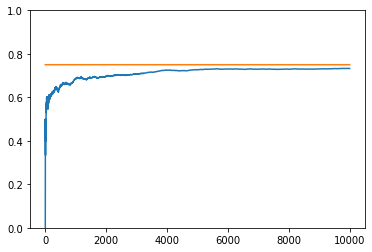

In [11]:
experiment()